In [1]:
import pandas as pd
data_spam =pd.read_csv("spamham.csv")

In [2]:
## Récupérer les instances (X) et les classes (y) et vectoriser
y = data_spam["spam"]

from sklearn.feature_extraction.text import CountVectorizer
V = CountVectorizer(ngram_range = (1,2) )
X = V.fit_transform(data_spam["text"])

## séparer train test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

**On avait déjà vu un exemple simple d'évaluation, l'exactitude :**

In [3]:
#classifier
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.1, random_state=0)
ppn.fit(X_train, y_train)
y_pred = ppn.predict(X_test)

# On fait la somme de tous les cas où la valeur dans y_test est bien trouvée dans y_pred
good = (y_test == y_pred).sum()
bad = (y_test != y_pred).sum()
print('Bons résultats %d' % good)
print('Erreurs: %d' % bad)
print(good/(bad+good))

Bons résultats 1685
Erreurs: 34
0.9802210587550901


**Maintenant allons plus loin dans l'évaluation**

In [4]:
from sklearn.metrics import classification_report

print(1314/(1314+405))
report = classification_report(y_test, y_pred)
print(report)

##Comme nous savons que le 1 c'est spam et le 0 c'est ham, on peut écrire ceci
nom_classes = ["ham", "spam"]
report = classification_report(y_test, y_pred, target_names=nom_classes, digits=4)
print(report)

0.7643979057591623
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1314
           1       0.95      0.97      0.96       405

    accuracy                           0.98      1719
   macro avg       0.97      0.98      0.97      1719
weighted avg       0.98      0.98      0.98      1719

              precision    recall  f1-score   support

         ham     0.9900    0.9840    0.9870      1314
        spam     0.9492    0.9679    0.9584       405

    accuracy                         0.9802      1719
   macro avg     0.9696    0.9760    0.9727      1719
weighted avg     0.9804    0.9802    0.9803      1719



Précision, rappel, f-mesure: c'est du déjà vu

Le **support** c'est le nombre d'instances concernées

La **weighted f-mesure** (f-mesure pondérée ou micro moyenne de la F-mesure) c'est la moyenne des F-mesure mais pondérée (une classe compte en fonction de sa taille), ça représente mieux la classe majoritaire
--> on compte par instance

La **macro f-mesure** c'est la moyenne des F-mesure de chaque classe (indépendamment de leur taille), ça représente mieux la classe minoritaire généralement plus difficile à trouver
--> on compte par classe

In [50]:
## On peut enregistrer le classification report pour s'en servir plus tard
with open("report_classifier=perceptron_dataset=spam.txt", "w") as w:
    w.write(report)


In [51]:
with open("report_classifier=perceptron_dataset=spam.txt") as f:
    r = f.read()
print(r)

              precision    recall  f1-score   support

         ham     0.9900    0.9840    0.9870      1314
        spam     0.9492    0.9679    0.9584       405

    accuracy                         0.9802      1719
   macro avg     0.9696    0.9760    0.9727      1719
weighted avg     0.9804    0.9802    0.9803      1719



In [52]:
import json
report = classification_report(y_test, y_pred, target_names=nom_classes, digits=4, output_dict = True)
print(report)
with open("classificatio_report.json", "w") as w:
    w.write(json.dumps(report, indent=2))

{'ham': {'precision': 0.9900459418070444, 'recall': 0.9840182648401826, 'f1-score': 0.9870229007633587, 'support': 1314}, 'spam': {'precision': 0.9491525423728814, 'recall': 0.9679012345679012, 'f1-score': 0.958435207823961, 'support': 405}, 'accuracy': 0.9802210587550901, 'macro avg': {'precision': 0.9695992420899628, 'recall': 0.975959749704042, 'f1-score': 0.9727290542936599, 'support': 1719}, 'weighted avg': {'precision': 0.9804113712597285, 'recall': 0.9802210587550901, 'f1-score': 0.9802875804373226, 'support': 1719}}


In [53]:
##On peut avoir la même chose sous forme de liste python :
from sklearn.metrics import precision_recall_fscore_support
stats = precision_recall_fscore_support(y_test, y_pred)
print(stats)
##dans l'ordre les précisions pour chaque classe, puis les rappels ...

(array([0.99004594, 0.94915254]), array([0.98401826, 0.96790123]), array([0.9870229 , 0.95843521]), array([1314,  405]))


** Et maintenant la matrice de confusion **

[[1293   21]
 [  13  392]]


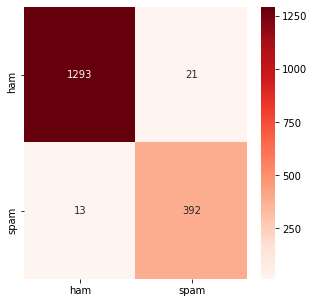

In [54]:
from sklearn.metrics import confusion_matrix



import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

matrice_confusion = confusion_matrix(y_test, y_pred)
print(matrice_confusion)
fig, ax = plt.subplots(figsize=(5,5))
classes = ["ham", "spam"]
sns.heatmap(matrice_confusion, cmap = plt.cm.Reds, 
            xticklabels=classes, yticklabels=classes, 
            annot=True, fmt ="d")

#sns.heatmap(matrice_confusion, xticklabels=["ham", "spam"], yticklabels=["ham", "spam"], cmap = plt.cm.Greys )
plt.show()

**Regardons maintenant un arbre de décision pour jouer avec les paramètres**

In [55]:
from sklearn import tree
DT = tree.DecisionTreeClassifier()
DT = DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)


In [56]:
matrice_confusion = confusion_matrix(y_test, y_pred)
print(matrice_confusion)

[[1257   57]
 [  31  374]]


**regardons l'impact du paramètres random_state**

In [64]:
import time
import os
print("Avec la valeur par défaut de random state")
start = time.clock()

for i in range(4):
  nom_figure = "Figures/DT_%i.png"%i
  if os.path.exists(nom_figure) == True:
        print("déjà fait")
        continue
  DT = tree.DecisionTreeClassifier()
  DT = DT.fit(X_train, y_train)
  y_pred = DT.predict(X_test)

  matrice_confusion = confusion_matrix(y_test, y_pred)
  print(matrice_confusion)
  stats = precision_recall_fscore_support(y_test, y_pred)
  print(stats)
  print("--"*10)
  fig, ax = plt.subplots(figsize=(5,5))
  classes = ["ham", "spam"]
  sns.heatmap(matrice_confusion, cmap = plt.cm.Reds, 
            xticklabels=classes, yticklabels=classes, 
            annot=True, fmt ="d")
  plt.savefig(nom_figure)
  plt.show()
  print("")
end = time.clock()
print("Durée : ", end-start)

Avec la valeur par défaut de random state
déjà fait
déjà fait
déjà fait
déjà fait
Durée :  0.0014150000000086038


/home/rundimeco/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  after removing the cwd from sys.path.
/home/rundimeco/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


In [61]:
print("En fixant random state")

for i in range(3):
  DT = tree.DecisionTreeClassifier(random_state=0)
  DT = DT.fit(X_train, y_train)
  y_pred = DT.predict(X_test)
  matrice_confusion = confusion_matrix(y_test, y_pred)
  print(matrice_confusion)
  stats = precision_recall_fscore_support(y_test, y_pred)
  print(stats)
  print("")
end = time.clock()
print("Durée : ", end-start)

En fixant random state
[[1261   53]
 [  37  368]]
(array([0.97149461, 0.87410926]), array([0.95966514, 0.90864198]), array([0.96554364, 0.89104116]), array([1314,  405]))

[[1261   53]
 [  37  368]]
(array([0.97149461, 0.87410926]), array([0.95966514, 0.90864198]), array([0.96554364, 0.89104116]), array([1314,  405]))



KeyboardInterrupt: 

**Allez voir sur https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html**

**regardez l'explication donnée sur ce paramètre**

Intéressez vous ensuite aux paramètres suivants: max_depth, min_samples_split, min_samples_leaf et max_features

Lancez différentes expériences pour voir leur impact respectif


## Tester d'autres caracétristiques

Ce que l'on a fait jusqu'ici c'est du sac de mots, ou Bag of Words (BOW), même si on ajouté des choses:

- n-grams
- caractères plutôt que mots (sac de caractères si on peut dire)
- pondération tf-idf

On va tester d'autres caractéristiques maintenant, ce que l'on va appeler des caractéristiques "stylistiques". On va pour chaque texte compter quelques caractéristiques, les ranger dans un vecteur et donner ça au classifieur.

In [ ]:
import statistics

X_stylo = []#notre nouvele matrice de description
for text in data_spam["text"]:
    liste_mots = text.split()
    phrases = text.split(". ")
    NB_phrases = len(phrases)
    NB_mots = len(liste_mots)
    NB_caracteres = len(text)
    moyenne_taille_mots = statistics.mean([len(x) for x in liste_mots])
    moyenne_taille_phrases = NB_mots/NB_phrases
    caracteristiques = [NB_phrases, NB_mots, NB_caracteres, moyenne_taille_mots, moyenne_taille_phrases]
    X_stylo.append(caracteristiques)

Chaque texte est décrit par 5 caractéristiques, et on va voir si le classifieur arrive à quelque chose

In [ ]:
## Notez bien dans les parenthèses que l'on utilise X_stylo désormais
X_train, X_test, y_train, y_test = train_test_split(X_stylo, y, test_size=0.3, random_state=0)
DT = tree.DecisionTreeClassifier()
DT = DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)
matrice_confusion = confusion_matrix(y_test, y_pred)
print(matrice_confusion)
stats = precision_recall_fscore_support(y_test, y_pred)
print(stats)
report = classification_report(y_test, y_pred, target_names=nom_classes)
print(report)

In [ ]:
y_spam = [1 for x in y_test]##une liste remplie de 1
report = classification_report(y_test, y_spam, target_names=nom_classes)
matrice_confusion = confusion_matrix(y_test, y_spam)
print(matrice_confusion)
print(report)

y_ham = [0 for x in y_test]##une liste remplie de 0
report = classification_report(y_test, y_ham, target_names=nom_classes)
matrice_confusion = confusion_matrix(y_test, y_ham)
print(matrice_confusion)
print(report)

**Et maintenant on combine le BOW et le stylométrique**

In [ ]:
## on regarde la "forme" de X
print(X.shape[0])#NB lignes   -> instances
print(X.shape[1])#Nb colonnes -> caractéristiques

##on crée une sparse matrix avec notre X_stylo
from scipy.sparse import csr_matrix
sparse_stylo = csr_matrix(X_stylo)
print(sparse_stylo.shape[0])#NB lignes   -> instances
print(sparse_stylo.shape[1])#Nb colonnes -> caractéristiques

## on ale même nombre de ligne, on fait donc une conctaténation horizontale :
from scipy.sparse import hstack
X_fusion = hstack((X, sparse_stylo))

**Et on y va !**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_fusion, y, test_size=0.3, random_state=0)
DT = tree.DecisionTreeClassifier()
DT = DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)
matrice_confusion = confusion_matrix(y_test, y_pred)
print(matrice_confusion)
stats = precision_recall_fscore_support(y_test, y_pred)
print(stats)
report = classification_report(y_test, y_pred, target_names=nom_classes)
print(report)

Malheureusement ça marche moins bien que le BOW tout seul (ce qui ne signifie pas que ce serait le cas sur tout jeu de données).

**Pour Aller plus loin sur l'exploration des paramètres**

Dans un nouveau notebook, explorez les possibilités offertes par les forêtes d'arbres aléatoires : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html